<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/Lendenclub_investmentAPP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 12 club (com.twelve.club)

2 Lendenclub investment (com.innofinsolutions.lendenclub.lender)

3 Lendenclub borrower (com.innofinsolutions.instamoney)

4 Faircent (com.app.faircent)

5 Lendbox(in.lendbox.app)

6 Rupeecircle(com.fintelligence.rupeecircle)

7 i2i funding (com.i2ifunding_investorapp)

8 i2i borrower (com.i2iborrower)
 

In [ ]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.innofinsolutions.lendenclub.lender',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [ ]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c2cfd8c9-5922-455f-87d9-9200ffccb114,Mehboob Shaikh,https://play-lh.googleusercontent.com/a-/ACB-R...,This app is easy to use and has a very user fr...,5,31,4.0.2,2023-03-13 10:32:57,"Hi, Thanks for your feedback. We are continuou...",2023-03-14 05:31:48,4.0.2
1,f89b06bd-000b-4569-b157-d42274d8640a,DEEPU ramachandran,https://play-lh.googleusercontent.com/a-/ACB-R...,"Able to find only add funds to portfolio, no o...",1,1,4.0.4,2023-04-21 05:59:14,"Hi Deepu, We focus on long-term investment goa...",2023-04-21 05:40:16,4.0.4
2,e7dcd185-fb13-4014-86b1-1d8421e60c32,Preeti Maxien,https://play-lh.googleusercontent.com/a-/ACB-R...,It is one of the best apps for P2P investments...,5,21,4.0.2,2023-03-13 10:37:36,"Hi, Thanks for your feedback. We are continuou...",2023-03-14 05:32:13,4.0.2
3,fdff6340-481b-4272-90df-85aab035574b,Shubham Gurjar,https://play-lh.googleusercontent.com/a/AGNmyx...,LenDen Club fits my definition of a platform b...,5,0,4.0.4,2023-04-27 12:33:38,"Hi, Thanks for your feedback. We are continuou...",2023-04-28 09:16:36,4.0.4
4,94928130-8e13-4d24-b943-0f8405c43eca,Isha Khera,https://play-lh.googleusercontent.com/a-/ACB-R...,Great platform for people who are just startin...,5,0,4.0.4,2023-04-26 15:51:03,"Hi, Thanks for your feedback. We are continuou...",2023-04-27 05:07:04,4.0.4


In [ ]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              2236 non-null   object        
 1   userName              2236 non-null   object        
 2   userImage             2236 non-null   object        
 3   content               2236 non-null   object        
 4   score                 2236 non-null   int64         
 5   thumbsUpCount         2236 non-null   int64         
 6   reviewCreatedVersion  865 non-null    object        
 7   at                    2236 non-null   datetime64[ns]
 8   replyContent          2228 non-null   object        
 9   repliedAt             2228 non-null   datetime64[ns]
 10  appVersion            865 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 192.3+ KB


In [ ]:
#df_reviews.to_csv('12club_review.csv')

In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

5    1607
1     504
4      48
2      44
3      33
Name: score, dtype: int64

<Axes: ylabel='score'>

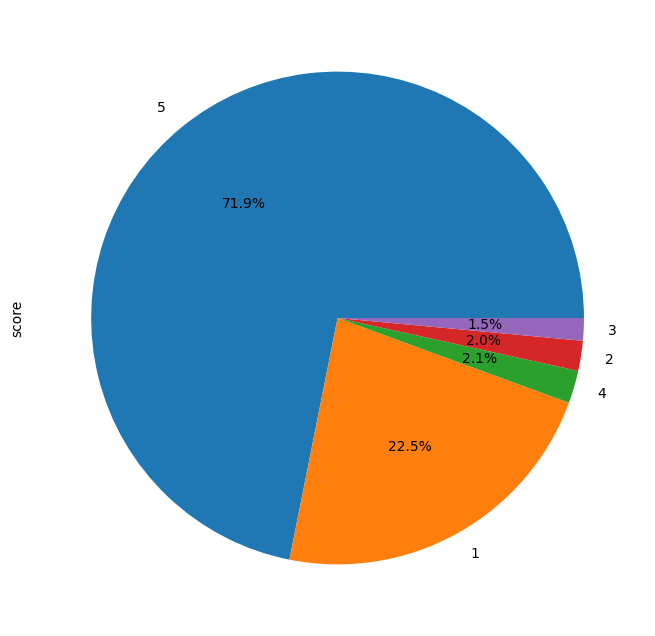

In [ ]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,This app is easy to use and has a very user fr...,5
1,"Able to find only add funds to portfolio, no o...",1
2,It is one of the best apps for P2P investments...,5
3,LenDen Club fits my definition of a platform b...,5
4,Great platform for people who are just startin...,5


Install azure text analytics API

In [ ]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [ ]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [ ]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Streaming output truncated to the last 5000 lines.
Review Content Score: 5
Review Content: Good job team, this is an amazing lenders app for everyone lenders as well as borrowers, good luck team.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Remarkable performance, I highly recommend this lendenclub app to all investors for better return which you can not get from anywhere else.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: My invested fund is blocked for 1 year. I can't use/withdraw my funds my in
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Hats off to the person taken by this application. Collection team services just unbelievable I got very impressed with them.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Better and good than others, I have got almost 35% of returns on investment in lenden club which i can not get from anywhere else.
Review Content Sentiment: positi

In [ ]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    1582
negative     458
neutral       98
mixed         98
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

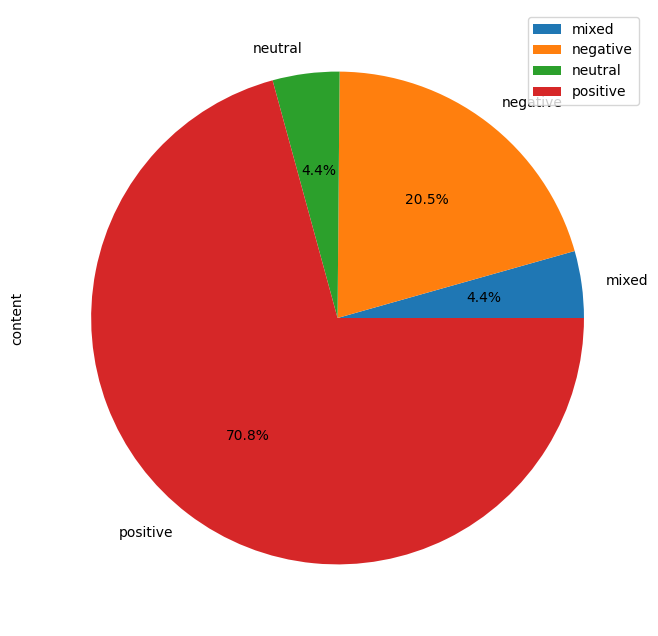

In [ ]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                  52
           2                   6
           3                   4
           4                   7
           5                  29
negative   1                 394
           2                  27
           3                  17
           4                   6
           5                  14
neutral    1                  37
           2                   8
           3                   7
           4                   3
           5                  43
positive   1                  21
           2                   3
           3                   5
           4                  32
           5                1521
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

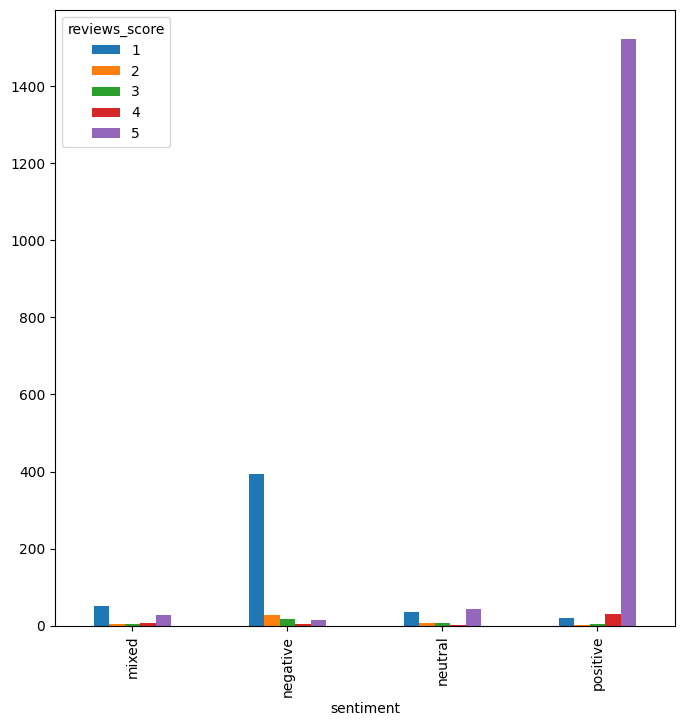

In [ ]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [ ]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        2236 non-null   object
 1   sentiment      2236 non-null   object
 2   reviews_score  2236 non-null   object
dtypes: object(3)
memory usage: 52.5+ KB


In [ ]:
reviews_content_sentiment.to_csv('lendenclubinvestor.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,This app is easy to use and has a very user fr...,positive,5
1,"Able to find only add funds to portfolio, no o...",neutral,1
2,It is one of the best apps for P2P investments...,positive,5
3,LenDen Club fits my definition of a platform b...,positive,5
4,Great platform for people who are just startin...,positive,5


In [ ]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [ ]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [ ]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [ ]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        2236 non-null   object
 1   sentiment      2236 non-null   int64 
 2   reviews_score  2236 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 52.5+ KB


In [ ]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                  21
           2                   3
           3                   5
           4                  32
           5                1521
1          1                  37
           2                   8
           3                   7
           4                   3
           5                  43
2          1                 394
           2                  27
           3                  17
           4                   6
           5                  14
3          1                  52
           2                   6
           3                   4
           4                   7
           5                  29
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

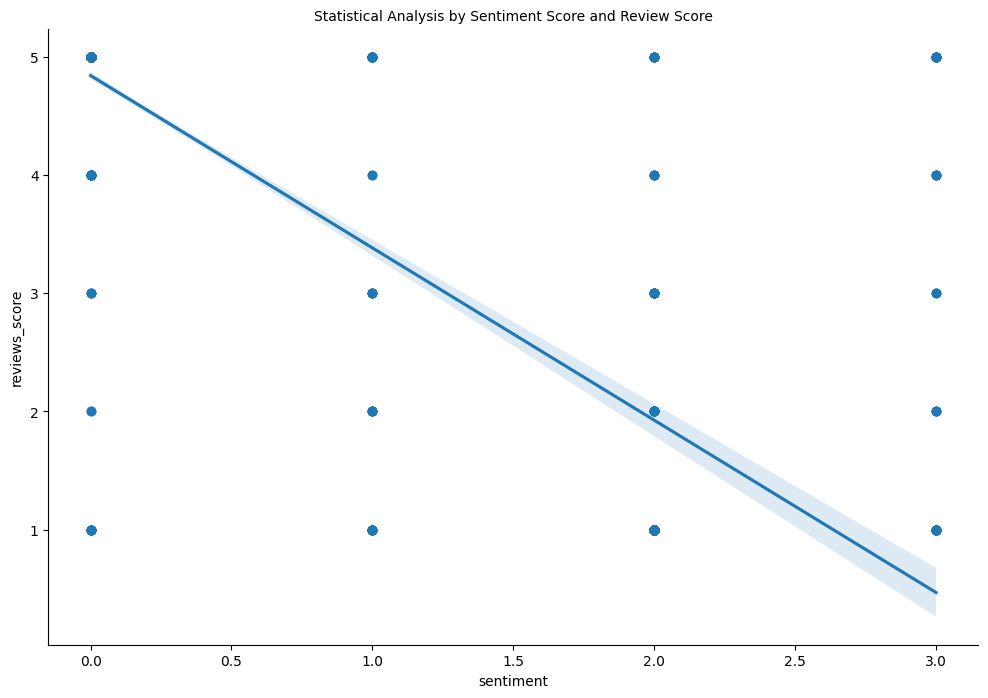

In [ ]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.